<a href="https://colab.research.google.com/github/ardi1998/mkauto/blob/master/notebooks/master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pazar3: remove \n from fields (https://github.com/ardi1998/mkauto/projects/2#card-40919970)

import json

with open('/content/drive/My Drive/Data Mining Project/allCars.json') as f:
  data = json.load(f)

def remove_chars(x):
  if x['adType']:
    x['adType'] = x['adType'].strip()
  
  if x['currentPrice']: 
    x['currentPrice'] = x['currentPrice'].strip(' \n')
  
  if x['description']:   
    x['description'] = x['description'].strip('\n ')
  
  if x['fuelType']: 
    x['fuelType'] = x['fuelType'].strip('\n')

  if x['mileage']:
    x['mileage'] = x['mileage'].strip('\n')
  
  if x['oldPrice']:
    x['oldPrice'] = x['oldPrice'].strip('\n')
  
  if x['productionYear']:
    x['productionYear'] = x['productionYear'].strip('\n')
  
  if x['registrationType']:
    x['registrationType'] = x['registrationType'].strip('\n')
  
  if x['sellerName']: 
    x['sellerName'] = x['sellerName'].strip('\n')
  
  if x['title']:
    x['title'] = x['title'].strip('\n')
  
  if ['sellerType']:
    x['sellerType'] = x['sellerType'].strip()
  
  if x['transmissionType']: 
    x['transmissionType'] = x['transmissionType'].strip('\n')
  
  return x

cleaned_data = [remove_chars(x) for x in data]

In [ ]:
# pazar3: fix the date issue (https://github.com/ardi1998/mkauto/projects/2#card-40922609)
# pazar3: remove duplicates

import pandas as pd

df = pd.DataFrame.from_dict(cleaned_data)
df['id'] = df['url'].apply(lambda x: x.split('/')[-1])
df.drop_duplicates(subset=['id'], inplace=True)

links = pd.read_json('/content/drive/My Drive/Data Mining Project/allDirectLinks.json')
links['id'] = links['link'].apply(lambda x: x.split('/')[-1])
links.drop_duplicates(subset=['id'], inplace=True)

df = pd.merge(links, df, on=['id', 'id'], how="inner")

months = {
    'јан.': '01',
    'јан': '01',
    'фев.': '02',
    'фев': '02',
    'мар.': '03',
    'мар': '03',
    'апр.': '04',
    'апр': '04',
    'мај.': '05',
    'мај': '05',
    'јун.': '06',
    'јун': '06',
    'јул.': '07',
    'јул': '07',
    'авг.': '08',
    'авг': '08',
    'септ.': '09',
    'септ': '09',
    'окт.': '10',
    'окт': '10',
    'ноем.': '11',
    'ноем': '11',
    'дек.': '12',
    'дек': '12'
}


def reformat_date(date, year):
  if "Денес" in date:
    date = date.replace("Денес", "2020-06-23")
  
  elif "Вчера" in date:
    date = date.replace("Вчера", "2020-06-22")
  
  else:
    day = date.split()[0]
    month = date.split()[1]
    time = date.split()[2]
    if int(months[month]) > 6 and year == 2020:
      year -= 1
    date = f"{year}-{months[month]}-{day} {time}"

  return date

year = 2020
prev_month = None
current_month = "јун."
new_dates = []

for i in range(0, len(df['id'])):
  date = df['date'].iloc[i]
  
  if "Денес" not in date and "Вчера" not in date:
    if months[date.split()[1]] != months[current_month]:
      prev_month = current_month
      current_month = date.split()[1]

      # here we check whether we entered a new year
      if months[prev_month] == "01" and months[current_month] == "12":
        # since the previous month was jan and this month is dec, 
        # it means we went a year back
        year -= 1
        print(f"year decreased; current_month={current_month}; prev_month={prev_month}; date={date} {year}")

      elif months[current_month] == "01" and months[prev_month] == "12":
        # this can and does happen in case the data retrival got mixed
        # this means the previous year change was an anomaly so we increase 
        # the year again
        year += 1
        print(f"year increased; current_month={current_month}; prev_month={prev_month}; date={date} {year}")

     
  new_dates.append(reformat_date(date, year))

df['date'] = new_dates
df.drop(columns=['link'])

df.to_json('/content/drive/My Drive/Data Mining Project/pazar3-v1.0.0.json')

year decreased; current_month=дек.; prev_month=јан.; date=29 дек. 17:49 2019
year increased; current_month=јан.; prev_month=дек.; date=28 јан. 22:56 2020
year decreased; current_month=дек.; prev_month=јан.; date=14 дек. 15:51 2019
year increased; current_month=јан.; prev_month=дек.; date=14 јан. 18:22 2020
year decreased; current_month=дек.; prev_month=јан.; date=24 дек. 14:33 2019
year increased; current_month=јан.; prev_month=дек.; date=03 јан. 09:22 2020
year decreased; current_month=дек.; prev_month=јан.; date=22 дек. 15:29 2019
year increased; current_month=јан.; prev_month=дек.; date=02 јан. 10:13 2020
year decreased; current_month=дек.; prev_month=јан.; date=31 дек. 22:05 2019
year decreased; current_month=дек.; prev_month=јан.; date=31 дек. 21:52 2018
year decreased; current_month=дек.; prev_month=јан.; date=31 дек. 22:14 2017
year decreased; current_month=дек.; prev_month=јан.; date=31 дек. 21:50 2016
year decreased; current_month=дек.; prev_month=јан.; date=31 дек. 19:19 2015

In [ ]:
df.iloc[0]

link                /oglas/vozila/Ford/Focus/se-prodava/stip/ford-...
id                                                            3420599
title                                              FORD FOCUS 1.8TDCI
currentPrice                                                1 850 ЕУР
oldPrice                                                         None
sellerName                                                       Ване
sellerNumber                                            tel:078393787
date                                                 2020-06-23 13:41
img_links           [https://media.pazar3.mk/Image/d32ce291-6c53-4...
description                          Возилото е произведено 2001 год.
adType                                                     Се продава
sellerType                                               Физичко лице
productionYear                                                   2001
transmissionType                                                Рачен
mileage             

In [ ]:
# reklama5: Parsing the scraped data

import pandas as pd
import datetime
import re


reklama5 = pd.read_json("/content/drive/My Drive/Data Mining Project/reklama5AllCars-v2.0.json", convert_dates=False)


def fix_current_price(price):
    price = price.strip("\r\n")
    if price == "По Договор":
        price = pd.NA
    elif "МКД" in price:
        price = price.strip("МКД ")
        price = price.replace('.', '').replace(',', '')
        price = int(round(int(price) / 61))
    elif "€" in price:
        price = price.strip("€ ")
        price = price.replace('.', '').replace(',', '')
    else:
        raise Exception('fix_current_price', 'price parsing error')
    return price


def fix_img_links(img_links):
    for index in range(len(img_links)):
        img_links[index] = img_links[index].replace(r"background-image:url('//", "").rstrip(r"')")
    return img_links


def fix_registered_until(date):
    if str(date) == "nan":
        return pd.NA
    if pd.isna(date):
        return date
    date_time_obj = datetime.datetime.strptime(date, '%m.%Y')
    return date_time_obj


def fix_seller_number(number):
    if len(number) <= 3 or len(number) >= 15 or has_numbers(number) is False:
        return pd.NA
    return number


def fix_city_municipality(to_parse):
    if pd.isna(to_parse):
        return pd.NA
    return to_parse.replace(r'<b class="adValue">', "").replace(r'</b>', "")


def round_and_convert_to_int(number):
    if str(number) == "nan":
        return pd.NA
    elif pd.isna(number):
        return number
    else:
        return int(round(int(number)))


def has_numbers(input_str):
    return bool(re.search(r'\d{2,}', input_str))


def remove_tags(text):
    tag_re = re.compile(r'<[^>]+>')
    return tag_re.sub('', text)


def process_details(details):
    details_translator = {
        'Марка': 'maker',
        'Модел': 'model',
        'Година': 'productionYear',
        'Километри': 'mileage',
        'Гориво': 'fuelType',
        'Боја': 'color',
        'Регистрација': 'registrationType',
        'Регистрирана до': 'registeredUntil',
        'Менувач': 'transmissionType',
        'Сила на моторот': 'power',
        'Каросерија': 'carType',
        'Kласа на емисија': 'emissionClass'
    }

    details = list(map(remove_tags, details))

    details_dict = {
        'maker': pd.NA,
        'model': pd.NA,
        'productionYear': pd.NA,
        'mileage': pd.NA,
        'fuelType': pd.NA,
        'color': pd.NA,
        'registrationType': pd.NA,
        'registeredUntil': pd.NA,
        'transmissionType': pd.NA,
        'power': pd.NA,
        'carType': pd.NA,
        'emissionClass': pd.NA
    }

    for detail in details:
        strs = detail.split(": ")
        details_dict[details_translator[strs[0]]] = strs[1].strip()

    return details_dict


details_dicts = reklama5['details'].apply(lambda x: process_details(x))
reklama5['maker'] = details_dicts.apply(lambda x: x['maker'])
reklama5['model'] = details_dicts.apply(lambda x: x['model'])
reklama5['productionYear'] = details_dicts.apply(lambda x: x['productionYear'])
reklama5['mileage'] = details_dicts.apply(lambda x: x['mileage'])
reklama5['fuelType'] = details_dicts.apply(lambda x: x['fuelType'])
reklama5['color'] = details_dicts.apply(lambda x: x['color'])
reklama5['registrationType'] = details_dicts.apply(lambda x: x['registrationType'])
reklama5['registeredUntil'] = details_dicts.apply(lambda x: x['registeredUntil'])
reklama5['transmissionType'] = details_dicts.apply(lambda x: x['transmissionType'])
reklama5['power'] = details_dicts.apply(lambda x: x['power'])
reklama5['carType'] = details_dicts.apply(lambda x: x['carType'])
reklama5['emissionClass'] = details_dicts.apply(lambda x: x['emissionClass'])

reklama5.drop(columns=['details', 'adType'], inplace=True)

reklama5['mileage'] = reklama5['mileage'].apply(round_and_convert_to_int)
reklama5['productionYear'] = reklama5['productionYear'].apply(round_and_convert_to_int)
reklama5['currentPrice'] = reklama5['currentPrice'].apply(fix_current_price)
reklama5['img_links'] = reklama5['img_links'].apply(fix_img_links)
reklama5['registeredUntil'] = reklama5['registeredUntil'].apply(fix_registered_until)
reklama5['sellerNumber'] = reklama5['sellerNumber'].apply(fix_seller_number)
reklama5['municipality'] = reklama5['municipality'].apply(fix_city_municipality)
reklama5['city'] = reklama5['city'].apply(fix_city_municipality)
reklama5['date'] = reklama5['date'].apply(lambda x: f"{x.split('.')[2]}-{x.split('.')[1]}-{x.split('.')[0]} 00:00:00")


reklama5.to_json('/content/drive/My Drive/Data Mining Project/reklama5-v3.0.0.json')

In [ ]:
# pazar3: Price converted to EUROS only, Location divided in two columns: city and municipality

pazar3 = pd.read_json("/content/drive/My Drive/Data Mining Project/pazar3-v1.0.0.json")

def has_numbers(input_str):
    return bool(re.search(r'\d', input_str))


def fix_current_price(price):
    if pd.isna(price) or has_numbers is False or price == "-":
        return pd.NA

    price = price.replace("\r", "")
    price = price.replace("\n", "")

    if "МКД" in price:
        new_price_str = price.rstrip(" МКД").replace(" ", "")
        return int(round(int(new_price_str) / 61))
    elif "ЕУР" in price:
        return int(price.rstrip(" ЕУР").replace(" ", ""))


def process_locations(locations):
    locations_dict = {
        "city": pd.NA,
        "municipality": pd.NA,
    }

    if pd.isna(locations):
        locations_dict["city"] = pd.NA
        locations_dict["municipality"] = pd.NA
    else:
        parts = locations.split(", ")
        if len(parts) == 2:
            locations_dict["city"] = parts[0].strip()
            locations_dict["municipality"] = parts[1].strip()
        else:
            locations_dict["city"] = parts[0].strip()
            locations_dict["municipality"] = pd.NA

    return locations_dict


locations_dicts = pazar3['location'].apply(lambda x: process_locations(x))
pazar3['city'] = locations_dicts.apply(lambda x: x['city'])
pazar3['municipality'] = locations_dicts.apply(lambda x: x['municipality'])
pazar3.drop(columns=['location'], inplace=True)

pazar3['currentPrice'] = pazar3['currentPrice'].apply(fix_current_price)
pazar3['oldPrice'] = pazar3['oldPrice'].apply(fix_current_price)

pazar3.to_json('/content/drive/My Drive/Data Mining Project/pazar3-v2.0.0.json')

In [ ]:
reklama5

,title,currentPrice,sellerName,sellerNumber,date,img_links,description,city,municipality,maker,model,productionYear,mileage,fuelType,color,registrationType,registeredUntil,transmissionType,power,carType,emissionClass
0,OPEL MERIVA 1.4 90KS REDIZAJN (157 000KM.),3300,TANEVSKI AVTOMOBILI,076-308-629,"2020,-08-14 00:00:00",[reklama5.mk/photos/small/ebd540be-0643-4c4e-9...,OPEL MERIVA REDIZAJN 1.4 90KS MOTOR NA LANCE E...,Битола,Битола,Opel,Meriva,2006,150000,Бензин,Сива,Македонска,2020-08-01 00:00:00,Рачен,66 kw / 90 ks,Моноволумен,Еуро 4
1,Se prodava odlicna Opel Corsa 2007 godina,3900,Boban,078233348,"2020,-08-15 00:00:00",[reklama5.mk/photos/small/77f2ed08-e153-46c7-a...,"Se prodava Opel Corsa,1.3 diesel,ekonomicen mo...",Куманово,Куманово,Opel,Corsa,2007,160000,Дизел,Црна,Македонска,2021-07-01 00:00:00,Рачен,55 kw / 75 ks,Maли градски,Еуро 5
2,Tiguan 1.9 TDI 2007,<NA>,Ilber,070452852,"2020,-08-02 00:00:00",[reklama5.mk/photos/small/27258b32-02b3-49b6-9...,A test foli,Куманово,Куманово,VW Volkswagen,Touran,2007,200000,Дизел,Сива,Македонска,2021-05-01 00:00:00,Рачен,77 kw / 105 ks,Моноволумен,Еуро 4
3,BMW 330D XDRIVE 2009,<NA>,Migjen,070326504,"2020,-08-15 00:00:00",[reklama5.mk/photos/small/84a91b6f-b8af-44d7-b...,Se prodava BMW 330d xdrive Lci (facelift),Гостивар,Гостивар,BMW,330,2009,200000,Дизел,Сива,Македонска,2021-07-01 00:00:00,Автоматски,180 kw / 245 ks,Седани,Еуро 5
4,Honda Accord 2.2 IDTEC,<NA>,xxxxxxx,078260584,"2020,-08-15 00:00:00",[reklama5.mk/photos/small/b430b5f6-593f-4de6-b...,Honda accord 2.2 idtec 150 hp,Скопје,Автокоманда,Honda,Accord,2010,200000,Дизел,Сива,Македонска,2021-07-01 00:00:00,Рачен,110 kw / 150 ks,Седани,Еуро 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55202,BMW X5 2011,21999,Ile,078604250,"2020,-07-31 00:00:00",[reklama5.mk/photos/small/003378f2-61bf-4a16-8...,Se prodava bmw x5 2011 189.000km uvezeno od US...,Штип,Штип,BMW,X 5,2011,180000,Дизел,Црна,Македонска,2021-09-01 00:00:00,Автоматски,199 kw / 271 ks,Теренци - SUV,Еуро 5
55203,"2010 VW Golf 1.6 TDI - 96,500 km - kupen od Po...",8100,Will Ethridge,070634690,"2020,-08-04 00:00:00",[reklama5.mk/photos/small/3b0a0179-ebd2-4f89-a...,"Golf 6, 1.6 TDI, EURO 5, so 5 vrati, aluminium...",Скопје,Скопје Центар,VW Volkswagen,Golf,2010,95000,Дизел,Црвена,Македонска,2021-07-01 00:00:00,Рачен,77 kw / 105 ks,Хеџбек,Еуро 5
55204,HONDA ACCORD 2.2 CTDI ××× MOZNA ZAMENA ×××,4300,Goran,075880907,"2020,-08-14 00:00:00",[reklama5.mk/photos/small/f20a8236-abea-41ad-8...,🔵 ZAMENA E MOZNA SAMO ZA POEVTINOO VOZILO SO V...,Битола,Битола,Honda,Accord,2004,190000,Дизел,Сива,Македонска,2021-05-01 00:00:00,Рачен,0 kw / 0 ks,Седани,Еуро 4
55205,VOLVO XC90,7200,Nikola,+38972314213,"2020,-08-15 00:00:00",[reklama5.mk/photos/small/436542c3-87d4-4a46-b...,Voziloto e vo odlicna sostojba registrirano do...,Прилеп,Прилеп,Volvo,XC 90,2006,200000,Дизел,Сива,Македонска,2021-01-01 00:00:00,Автоматски,136 kw / 185 ks,Теренци - SUV,Еуро 5


In [ ]:
pazar3

,link,id,title,currentPrice,oldPrice,sellerName,sellerNumber,date,img_links,description,adType,sellerType,productionYear,transmissionType,mileage,fuelType,registrationType,color,carType,maker,model,url,city,municipality
0,/oglas/vozila/Ford/Focus/se-prodava/stip/ford-...,3420599,FORD FOCUS 1.8TDCI,1850,<NA>,Ване,tel:078393787,2020-06-23 13:41:00,[https://media.pazar3.mk/Image/d32ce291-6c53-4...,Возилото е произведено 2001 год.,Се продава,Физичко лице,2001,Рачен,190 000 - 199 999,Нафта,Македонска,Сива,Караван,Ford,Focus,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Штип,<NA>
1,/oglas/vozila/Chrysler/300C/se-prodava/gostiva...,3330183,Chrysler 300C,<NA>,<NA>,nijar,tel:071479479,2020-06-23 13:40:00,[https://media.pazar3.mk/Image/16c4fead-a30a-4...,Top sostojba reg do 20.12.2020,Се продава,Физичко лице,2006,Автоматски,200 000 - 249 999,Нафта,Македонска,Сива,Караван,Chrysler,300C,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Врапчиште,Гостивар
2,/oglas/vozila/Toyota/Hilux/se-prodava/bitola/t...,2830478,Toyota Hilux,<NA>,<NA>,Zoran,tel:072422960,2020-06-23 13:38:00,[https://media.pazar3.mk/Image/f8101e0c-4e4a-4...,Toyota Hilux 1987 Model,Се продава,Физичко лице,1987,Рачен,250 000 - 299 999,Нафта,Странска,Бела,SUV/Теренско,Toyota,Hilux,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Битола,<NA>
3,/oglas/vozila/Kia/Carnival/se-prodava/skopje/k...,2823753,Kia Carnival II 2.9 Dizel,2000,2300,Гералд Раух,None,2020-06-23 13:37:00,[https://media.pazar3.mk/Image/8764a983c650487...,Се продава Kia Carnival II 2.9 Diesel. Година:...,Се продава,Физичко лице,2004,Рачен,250 000 - 299 999,Друго,Македонска,Сина,Караван,Kia,Carnival,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Центар,Скопjе
4,/oglas/vozila/Mercedes-Benz/200/se-prodava/bit...,3064946,Mercedes-Benz C 200 CDI redesign,2200,<NA>,Peco,tel:075893394,2020-06-23 13:37:00,[https://media.pazar3.mk/Image/399ce99b-61b9-4...,Se prodava Mercedes C200 CDI 76kw 101hp,Се продава,Физичко лице,1998,Рачен,30 000 - 34 999,Нафта,Македонска,Сива,Седан,Mercedes-Benz,200,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Могила,Битола
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75533,/oglas/vozila/Seat/Ibiza/se-prodava/skopje/sea...,1241815,Seat Ibiza 1.4 TDI-klima- servisna kniska -03,4380,<NA>,поло,tel:078620950,2014-01-30 13:42:00,[https://media.pazar3.mk/Image/150C5BA7D3534E8...,Seat-Ibiza 2003g. 1.4 TDI-klima(со сервисна кн...,Се продава,Физичко лице,2003,Рачен,130 000 - 139 999,Нафта,Македонска,"Скопје, Скопjе",None,None,None,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Seat,<NA>
75534,/oglas/vozila/se-prodava/prilep/hyundai-accent...,364255,Hyundai Accent 1.3 vo odlicna sostojba,<NA>,<NA>,Vasko,tel:075308042,2014-08-31 15:52:00,[https://media.pazar3.mk/Image/062bd614b17e4b2...,"Servo volan,dve vozdusni pernicina,elektrika n...",Се продава,Физичко лице,1999,Рачен,130 000 - 139 999,Бензин,None,None,None,None,None,https://www.pazar3.mk/oglas/vozila/avtomobili/...,<NA>,<NA>
75535,/oglas/vozila/Ford/Fiesta/se-prodava/skopje/fo...,1055025,Ford Fiesta -99- MM AVTODELTA,1800,2350,mm avtodelta,tel:070382637,2014-08-13 14:03:00,[https://media.pazar3.mk/Image/B2F6921E43A24A0...,,Се продава,Физичко лице,1999,Рачен,95 000 - 99 999,Бензин,Македонска,"Скопје, Скопjе",None,None,None,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Ford,<NA>
75536,/oglas/vozila/Mercedes-Benz/А-класа/A-170/se-p...,1041429,MERCEDES BENZ 1.7 CDI -99 FULL OPREMA,2900,<NA>,Dejan,tel:078 646 555,2014-07-31 10:47:00,[https://media.pazar3.mk/Image/54A1839F020649B...,"Lan4e, 4*AIRBAG, KLIMA, SERVO, ABS, ESP, ASR, ...",Се продава,Физичко лице,1999,Рачен\n,200 000 - 249 999,Нафта,Македонска,Виница,None,None,None,https://www.pazar3.mk/oglas/vozila/avtomobili/...,Mercedes-Benz,<NA>


In [ ]:
# combine datasets

import pandas as pd

reklama5 = pd.read_json('/content/drive/My Drive/Data Mining Project/reklama5-v3.0.0.json')
pazar3 = pd.read_json('/content/drive/My Drive/Data Mining Project/pazar3-v2.0.0.json')

print(reklama5.columns)
pazar3.drop(columns=['link', 'url', 'id'], inplace=True)
print(pazar3.columns)

reklama5['source'] = 'reklama5'
pazar3['source'] = 'pazar3'

pazar3['date'] = pazar3['date'].apply(lambda x: f"{x}")

reklama5['date'] = reklama5['date'].apply(lambda x: f"{x}")

pazar3['sellerNumber'] = pazar3['sellerNumber'].apply(lambda x: x[4:] if x is not None else None)

pd.concat([reklama5, pazar3]).reset_index(drop=True).to_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")

Index(['title', 'currentPrice', 'sellerName', 'sellerNumber', 'date',
       'img_links', 'description', 'city', 'municipality', 'maker', 'model',
       'productionYear', 'mileage', 'fuelType', 'color', 'registrationType',
       'registeredUntil', 'transmissionType', 'power', 'carType',
       'emissionClass'],
      dtype='object')
Index(['title', 'currentPrice', 'oldPrice', 'sellerName', 'sellerNumber',
       'date', 'img_links', 'description', 'adType', 'sellerType',
       'productionYear', 'transmissionType', 'mileage', 'fuelType',
       'registrationType', 'color', 'carType', 'maker', 'model', 'city',
       'municipality'],
      dtype='object')


In [ ]:
df = pd.read_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")
df.drop_duplicates(subset=['title', 'description', 'maker', 'model', 'sellerName', 'sellerNumber']).to_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")

In [ ]:
df = pd.read_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")

df['fuelType'] = df['fuelType'].apply(lambda x: x.strip() if x is not None else None).replace('Дизел', 'Нафта').replace('Плин / Бензин', 'Бензин / Плин')
df.to_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")

# 2. Visualizations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def get_df_in_quarters(df):
  quarters = []
  year = 2014
  while year < 2021:
    for start_month, end_month in [(1, 4), (4, 7), (7, 10), (10, 1)]:  

      start_date = pd.Timestamp(year=year, month=start_month, day=1, hour=0)
      
      if end_month == 1:
        year += 1
      
      end_date = pd.Timestamp(year=year, month=end_month, day=1, hour=0)
          
      quarters.append(df[(df['date'] >= start_date) & (df['date'] < end_date)])
  
  return quarters[:-1]

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json")
df

,title,currentPrice,sellerName,sellerNumber,date,img_links,description,city,municipality,maker,model,productionYear,mileage,fuelType,color,registrationType,registeredUntil,transmissionType,power,carType,emissionClass,source,oldPrice,adType,sellerType,region
0,OPEL MERIVA 1.4 90KS REDIZAJN (157 000KM.),3300.0,TANEVSKI AVTOMOBILI,076-308-629,2020-08-14 00:00:00,[reklama5.mk/photos/small/ebd540be-0643-4c4e-9...,OPEL MERIVA REDIZAJN 1.4 90KS MOTOR NA LANCE E...,Битола,Битола,Opel,Meriva,2006,150000,Бензин,Сива,Македонска,1.596240e+12,Рачен,66 kw / 90 ks,Моноволумен,Еуро 4,reklama5,NaN,None,None,Пелагониски
1,Se prodava odlicna Opel Corsa 2007 godina,3900.0,Boban,078233348,2020-08-15 00:00:00,[reklama5.mk/photos/small/77f2ed08-e153-46c7-a...,"Se prodava Opel Corsa,1.3 diesel,ekonomicen mo...",Куманово,Куманово,Opel,Corsa,2007,160000,Нафта,Црна,Македонска,1.625098e+12,Рачен,55 kw / 75 ks,Maли градски,Еуро 5,reklama5,NaN,None,None,Североисточен
2,Tiguan 1.9 TDI 2007,NaN,Ilber,070452852,2020-08-02 00:00:00,[reklama5.mk/photos/small/27258b32-02b3-49b6-9...,A test foli,Куманово,Куманово,VW Volkswagen,Touran,2007,200000,Нафта,Сива,Македонска,1.619827e+12,Рачен,77 kw / 105 ks,Моноволумен,Еуро 4,reklama5,NaN,None,None,Североисточен
3,BMW 330D XDRIVE 2009,NaN,Migjen,070326504,2020-08-15 00:00:00,[reklama5.mk/photos/small/84a91b6f-b8af-44d7-b...,Se prodava BMW 330d xdrive Lci (facelift),Гостивар,Гостивар,BMW,330,2009,200000,Нафта,Сива,Македонска,1.625098e+12,Автоматски,180 kw / 245 ks,Седани,Еуро 5,reklama5,NaN,None,None,Полошки
4,Honda Accord 2.2 IDTEC,NaN,xxxxxxx,078260584,2020-08-15 00:00:00,[reklama5.mk/photos/small/b430b5f6-593f-4de6-b...,Honda accord 2.2 idtec 150 hp,Скопје,Автокоманда,Honda,Accord,2010,200000,Нафта,Сива,Македонска,1.625098e+12,Рачен,110 kw / 150 ks,Седани,Еуро 5,reklama5,NaN,None,None,Скопски
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130694,Audi 80 1.9 tdi b4 -94,1499.0,pece,070350189,2014-05-22 08:28:00,[https://media.pazar3.mk/Image/8a013922729f49d...,voziloto e odrzavtano servisirano reg. do avgu...,Битола,None,Audi,80,1994,130 000 - 139 999,Нафта,Жолта/Златна,Македонска,NaN,Рачен\n,None,Седан,None,pazar3,NaN,Се продава,Физичко лице,Пелагониски
130695,VW GOLF 3 1.8 AVTOMATIK -95 ITNO,2000.0,Zoran,070 826 917,2014-04-29 09:54:00,[https://media.pazar3.mk/Image/6aed176ddb9d4dd...,5 STEPEN AVTOMATIK MENUVAC,Куманово,None,VW Volkswagen,Golf,1995,100 000 - 109 999,Бензин,Зелена,Македонска,NaN,Автоматски,None,Хачбек,None,pazar3,3000.0,Се продава,Физичко лице,Североисточен
130696,Audi Q5 2.0 Diesel S-Tronic S-Line -10,NaN,Flori,071220217,2014-08-03 08:29:00,[https://media.pazar3.mk/Image/330f46506fd142a...,Audi Q5 2.0 Diesel S-Tronic S-Line Ful Oprem,Струга,None,Audi,Q5,2010,90 000 - 94 999,Нафта,Црна,Странска,NaN,Автоматски,None,SUV/Теренско,None,pazar3,NaN,Се продава,Физичко лице,Југозападен
130697,SE ZA VASIOT DOM :MOZNA ZAMENA ZA AVTOMOBIL,NaN,fenix,075453400,2014-07-24 08:20:00,[https://media.pazar3.mk/Image/e9286de4598a4e5...,-SE ZA VASIOT DOM :MOZNA ZAMENA ZA KOLI SANITA...,Ресен,None,BMW,320,1999,130 000 - 139 999,Нафта,Црна,Македонска,NaN,Рачен,None,Хачбек,None,pazar3,NaN,Се продава,Физичко лице,Пелагониски


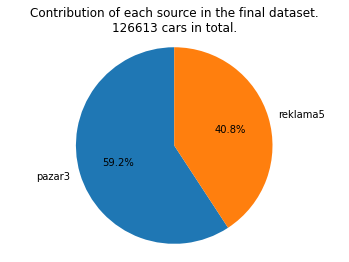

In [4]:
# simple stat for # examples from each source

df['source'].value_counts(dropna=False)

fig1, ax1 = plt.subplots()
ax1.pie([df['source'].value_counts(dropna=False)['pazar3'], 
         df['source'].value_counts(dropna=False)['reklama5']], 
        labels=['pazar3', 'reklama5'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title(f'Contribution of each source in the final dataset.\n{len(df)} cars in total.')

plt.show()

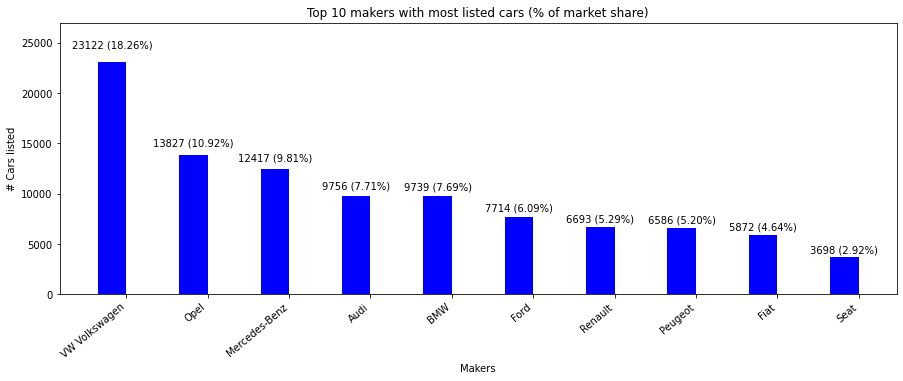

In [5]:
# most popular maker
import numpy as np

makers = df['maker'].value_counts(dropna=False)[0: 10]

N = len(makers)

maker_counts = [x[1] for x in makers.items()]
maker_labels = makers.keys()

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(ind, maker_counts, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Cars listed')
ax.set_xlabel('Makers')
ax.set_title('Top 10 makers with most listed cars (% of market share)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(maker_labels, ha='right', rotation=40)
ax.set_ylim(top=27000)

for rect in rects:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
    f'{height} ({height/len(df)*100:.2f}%)', ha='center', va='bottom')



plt.show()


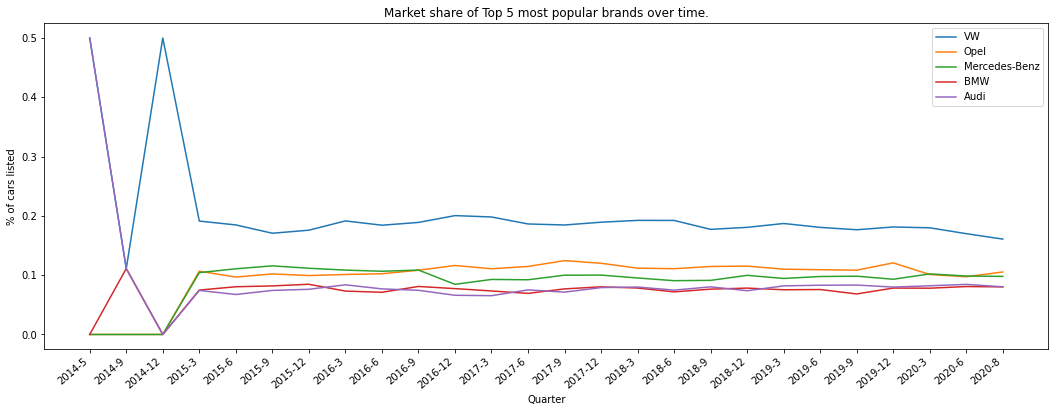

In [6]:
quarters = get_df_in_quarters(df)

vw = [len(x[x['maker'] == 'VW Volkswagen']) / len(x) for x in quarters[1:]]
opel = [len(x[x['maker'] == 'Opel']) / len(x) for x in quarters[1:]]
mercedes = [len(x[x['maker'] == 'Mercedes-Benz']) / len(x) for x in quarters[1:]]
bmw = [len(x[x['maker'] == 'BMW']) / len(x) for x in quarters[1:]]
audi = [len(x[x['maker'] == 'Audi']) / len(x) for x in quarters[1:]]

x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in quarters[1:]]

fig, ax = plt.subplots(figsize=(18, 6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Market share of Top 5 most popular brands over time.')
ax.set_ylabel('% of cars listed')
ax.set_xlabel('Quarter')

ax.plot(vw)
ax.plot(opel)
ax.plot(mercedes)
ax.plot(bmw)
ax.plot(audi)

ax.legend(['VW','Opel', 'Mercedes-Benz', 'BMW', 'Audi'])

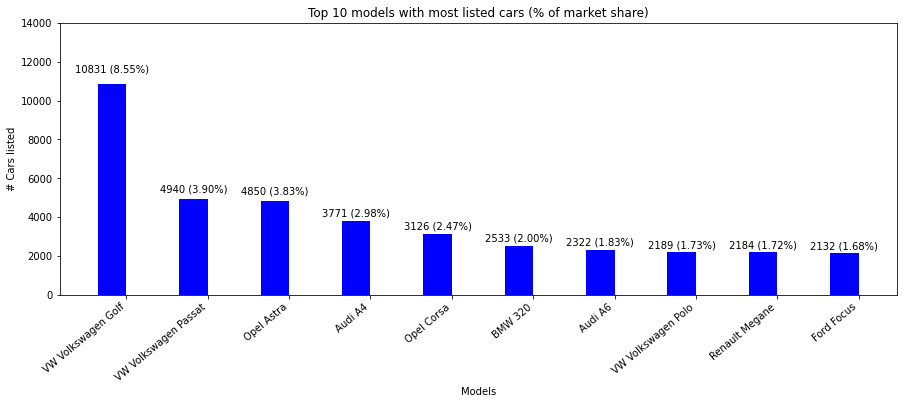

In [7]:
# most popular maker
import numpy as np

df["maker-model"] = df['maker'] + " " + df['model']

makers = df['maker-model'].value_counts(dropna=False)[0: 10]

N = len(makers)

maker_counts = [x[1] for x in makers.items()]
maker_labels = makers.keys()

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))
rects = ax.bar(ind, maker_counts, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Cars listed')
ax.set_xlabel('Models')
ax.set_title('Top 10 models with most listed cars (% of market share)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(maker_labels, rotation=40,  ha='right')
ax.set_ylim(top=14000)

for rect in rects:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
    f'{height} ({height/len(df)*100:.2f}%)', ha='center', va='bottom')



plt.show()


In [8]:
df = df.sort_values(by='date')

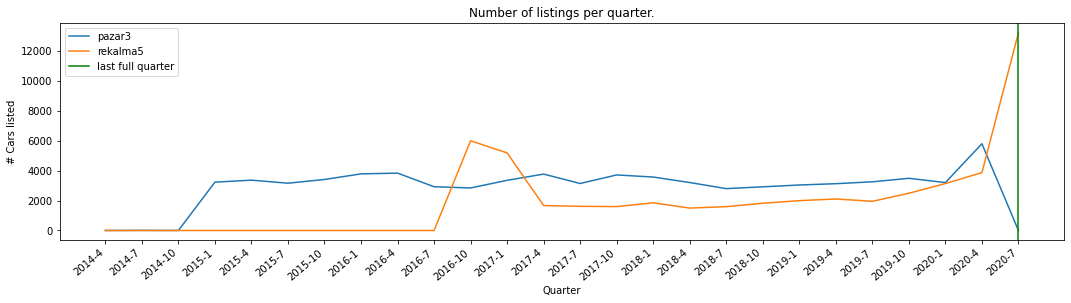

In [15]:
quarters = get_df_in_quarters(df)

pazar3 = [len(x) for x in [y[y['source'] == 'pazar3'] for y in quarters[1:]]]
reklama5 = [len(x) for x in [y[y['source'] == 'reklama5'] for y in quarters[1:]]]

x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in quarters[1:]]

fig, ax = plt.subplots(figsize=(18, 4))

ax.set_xticks(np.arange(len(pazar3)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Number of listings per quarter.')
ax.set_ylabel('# Cars listed')
ax.set_xlabel('Quarter')

ax.plot(pazar3)
ax.plot(reklama5)
ax.axvline(25, 0, 1, c='green')

ax.legend(['pazar3','rekalma5', 'last full quarter'])

In [16]:
def get_df_in_months(df, start_year=2019, end_year=2020):
  months = []
  for year in range(start_year, end_year + 1):
    for start_month in range(1, 13):  
      
      if (year == 2020 and start_month > 8):
        break

      start_date = pd.Timestamp(year=year, month=start_month, day=1, hour=0)
      
      if start_month == 12:
        end_date = pd.Timestamp(year=year + 1, month=1, day=1, hour=0)

      else:
        end_date = pd.Timestamp(year=year, month=start_month + 1, day=1, hour=0)
          
      months.append(df[(df['date'] >= start_date) & (df['date'] < end_date)])
  
  return months

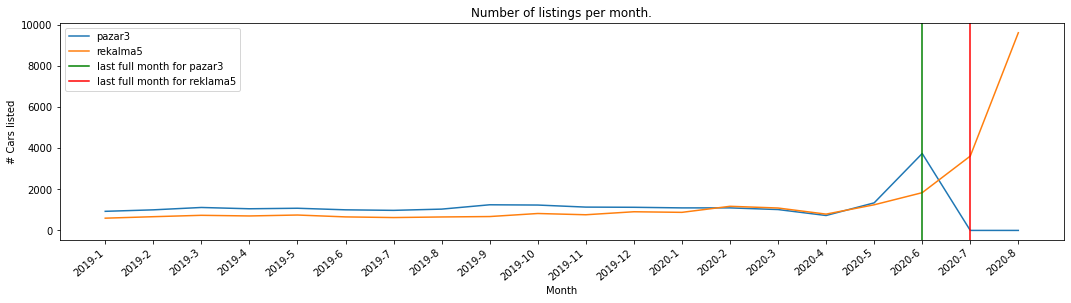

In [17]:
months = get_df_in_months(df)

pazar3 = [len(x) for x in [y[y['source'] == 'pazar3'] for y in months]]
reklama5 = [len(x) for x in [y[y['source'] == 'reklama5'] for y in months]]
x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in months]

fig, ax = plt.subplots(figsize=(18, 4))

ax.set_xticks(np.arange(len(pazar3)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Number of listings per month.')
ax.set_ylabel('# Cars listed')
ax.set_xlabel('Month')

ax.plot(pazar3)
ax.plot(reklama5)
ax.axvline(17, 0, 1, c='green')
ax.axvline(18, 0, 1, c='red')

ax.legend(['pazar3','rekalma5', 'last full month for pazar3', 'last full month for reklama5'])

# we do have a spike in the number of listins per quarter

In [18]:
import re

df['productionYear'] = df['productionYear'].apply(lambda x : int(float(re.sub("[^0-9.]", "", str(x)))) if x is not None else None)

prod_df = df.dropna(axis=0, subset=['productionYear'])
prod_df = prod_df[prod_df['productionYear'] >= 1900]
prod_df = prod_df[prod_df['productionYear'] <= 2020]

prod_df['age'] = prod_df['date'].apply(lambda x: x.year) - prod_df['productionYear']
prod_df = prod_df[prod_df['age'] >= 0]

In [19]:
prod_df['age'].value_counts(dropna=False)

13.0    11729
12.0    10814
14.0    10768
15.0     9417
11.0     8807
16.0     7955
17.0     7281
18.0     7084
10.0     6662
19.0     6287
20.0     5398
9.0      4588
21.0     4341
22.0     3596
8.0      3377
23.0     2568
7.0      2384
24.0     1926
6.0      1752
5.0      1357
25.0     1252
4.0       974
26.0      868
27.0      643
3.0       506
28.0      432
2.0       365
29.0      311
30.0      268
1.0       264
0.0       250
31.0      202
40.0      190
33.0      157
35.0      154
37.0      151
34.0      149
32.0      148
36.0      132
38.0      129
39.0      100
Name: age, dtype: int64

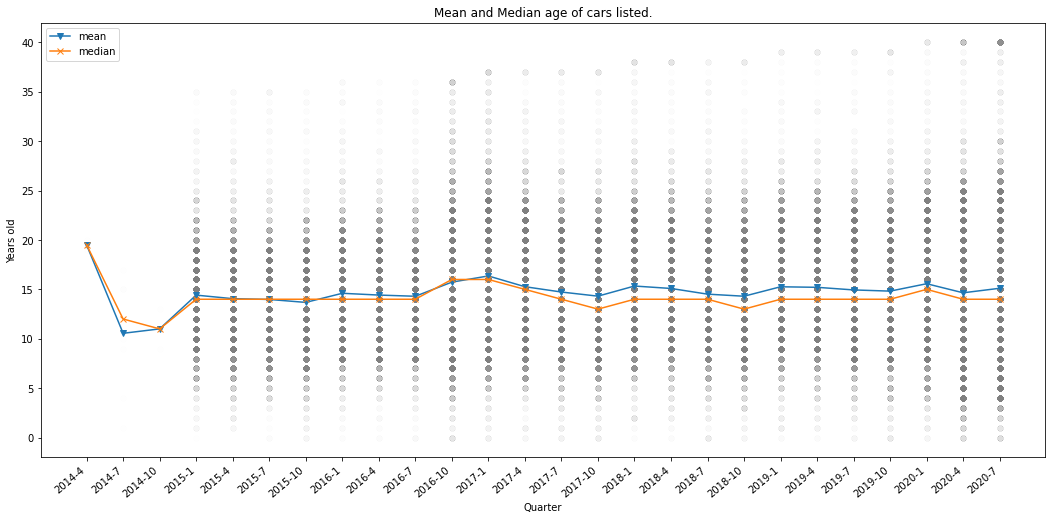

In [22]:
quarters = get_df_in_quarters(prod_df)

avg = [y['age'].mean() for y in quarters[1:]]
median = [y['age'].median() for y in quarters[1:]]
all = [y['age'].values for y in quarters[1:]]

x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in quarters[1:]]

fig, ax = plt.subplots(figsize=(18, 8))

ax.set_xticks(np.arange(len(all)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Mean and Median age of cars listed.')
ax.set_ylabel('Years old')
ax.set_xlabel('Quarter')


for i in range(len(all)):
  ax.scatter(x=np.full((len(all[i])), x[i]), y=all[i], color='grey', alpha=0.005)

ax.plot(avg, '-v')
ax.plot(median, '-x')


ax.legend(['mean', 'median',])

In [23]:
# remove price outliers

from scipy import stats

price_df = prod_df.dropna(subset=['currentPrice'])

price_df = price_df[(price_df['currentPrice'] >= 100) & (price_df['currentPrice'] <= 1000000)]

# zscores = np.abs(stats.zscore(price_df['currentPrice']))
# mask = zscores > 2.95

# price_df = price_df[~mask]

price_df['currentPrice'].value_counts(dropna=False)

2500.0     2083
3500.0     1977
3000.0     1820
2000.0     1623
1500.0     1550
           ... 
4434.0        1
5454.0        1
4869.0        1
10666.0       1
2559.0        1
Name: currentPrice, Length: 1561, dtype: int64

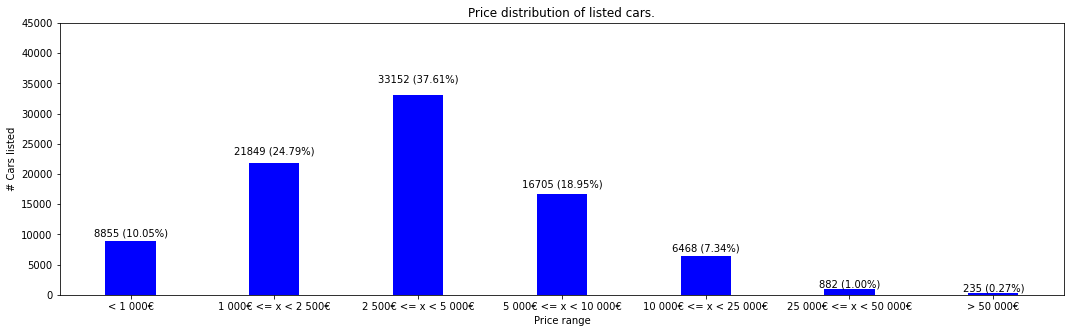

In [24]:
import numpy as np

price_range = [0, 1000, 2500, 5000, 10000, 25000, 50000]

cars_per_range = []
labels = ['< 1 000€', '1 000€ <= x < 2 500€', '2 500€ <= x < 5 000€', '5 000€ <= x < 10 000€', '10 000€ <= x < 25 000€', '25 000€ <= x < 50 000€', '> 50 000€']

for i in range(0, len(price_range) - 1):
  cars_per_range.append(price_df[(price_df['currentPrice'] >= price_range[i]) & (price_df['currentPrice'] < price_range[i + 1])])

cars_per_range.append(price_df[price_df['currentPrice'] >= price_range[-1]])

ind = np.arange(len(price_range))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(18, 5))
rects = ax.bar(ind, [len(x) for x in cars_per_range], width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('# Cars listed')
ax.set_xlabel('Price range')
ax.set_title('Price distribution of listed cars.')
ax.set_xticks(ind)
ax.set_xticklabels(labels,  ha='center')
ax.set_ylim(top=45000)

for rect in rects:
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2., 1.05*height,
    f'{height} ({height/len(price_df)*100:.2f}%)', ha='center', va='bottom')



plt.show()

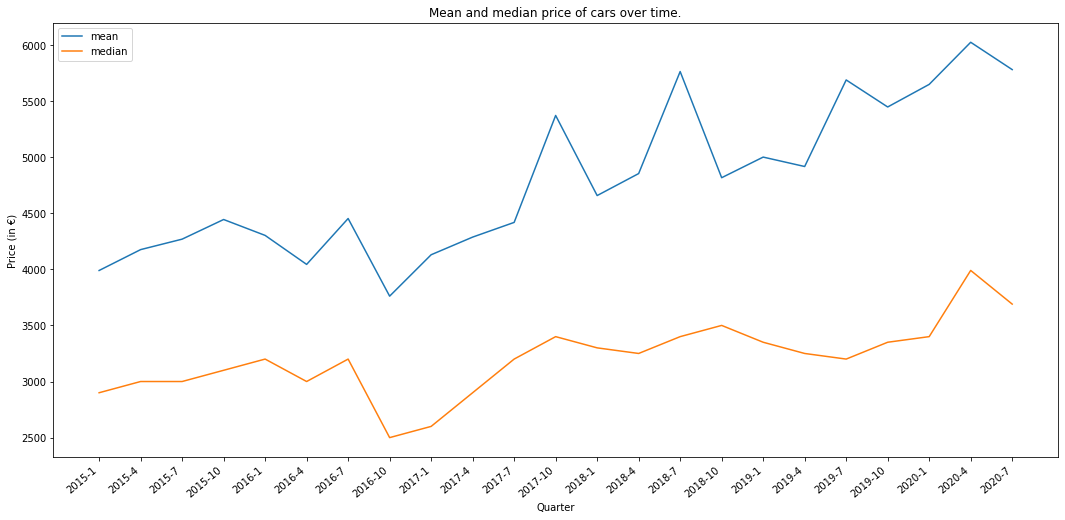

In [40]:
quarters = get_df_in_quarters(price_df)[4:]

avg = [y['currentPrice'].mean() for y in quarters]
median = [y['currentPrice'].median() for y in quarters]
all = [y['currentPrice'].values for y in quarters]

x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in quarters]

fig, ax = plt.subplots(figsize=(18, 8))

ax.set_xticks(np.arange(len(all)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Mean and median price of cars over time.')
ax.set_ylabel('Price (in €)')
ax.set_xlabel('Quarter')

ax.plot(avg)
ax.plot(median)


ax.legend(['mean', 'median',])

In [41]:
df['fuelType'] = df['fuelType'].apply(lambda x: x.strip() if x is not None else None).replace('Дизел', 'Нафта').replace('Плин / Бензин', 'Бензин / Плин')
df['fuelType'].value_counts(dropna=False)


Нафта                   87667
Бензин                  23859
Бензин / Плин           14092
NaN                       620
Друго                     228
Хибрид                    127
Електричен автомобил       20
Name: fuelType, dtype: int64

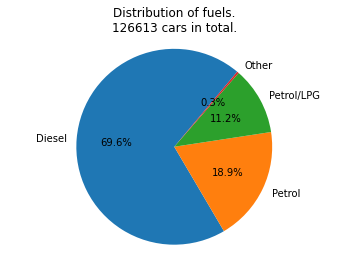

In [42]:
df['source'].value_counts(dropna=False)

fig1, ax1 = plt.subplots()
ax1.pie([df['fuelType'].value_counts(dropna=False)['Нафта'], 
         df['fuelType'].value_counts(dropna=False)['Бензин'],
         df['fuelType'].value_counts(dropna=False)['Бензин / Плин'],
         df['fuelType'].value_counts(dropna=False)['Електричен автомобил'] + 
         + df['fuelType'].value_counts(dropna=False)['Друго'] 
         + df['fuelType'].value_counts(dropna=False)['Хибрид']],
        labels=['Diesel', 'Petrol', 'Petrol/LPG', 'Other'], autopct='%1.1f%%', startangle=50)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title(f'Distribution of fuels.\n{len(df)} cars in total.')

plt.show()

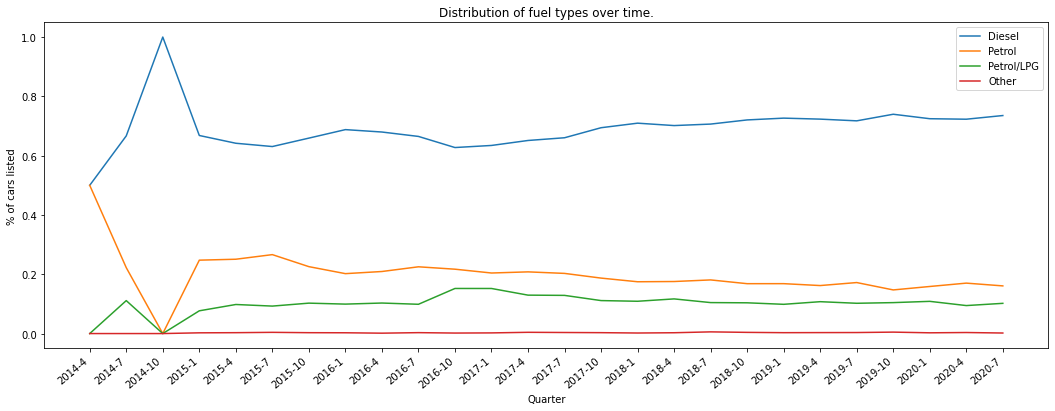

In [43]:
quarters = get_df_in_quarters(df)

diesel = [len(x[x['fuelType'] == 'Нафта']) / len(x) for x in quarters[1:]]
petrol = [len(x[x['fuelType'] == 'Бензин']) / len(x) for x in quarters[1:]]
petrol_lpg = [len(x[x['fuelType'] == 'Бензин / Плин']) / len(x) for x in quarters[1:]]
other = [len(x[(x['fuelType'] == 'Друго') | (x['fuelType'] == 'Хибрид') | (x['fuelType'] == 'Електричен автомобил')]) / len(x) for x in quarters[1:]]

x = [f'{x.iloc[0]["date"].year}-{x.iloc[0]["date"].month}' for x in quarters[1:]]

fig, ax = plt.subplots(figsize=(18, 6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation=40,  ha='right')

ax.set_title('Distribution of fuel types over time.')
ax.set_ylabel('% of cars listed')
ax.set_xlabel('Quarter')

ax.plot(diesel)
ax.plot(petrol)
ax.plot(petrol_lpg)
ax.plot(other)

ax.legend(['Diesel','Petrol', 'Petrol/LPG', 'Other'])

In [44]:
value_df = price_df.dropna(subset=['maker', 'model', 'productionYear'], how='any')

groups = value_df.groupby(['maker', 'model', 'productionYear', 'age']).apply(lambda x: x[x['currentPrice'].between(x['currentPrice'].quantile(.05), x['currentPrice'].quantile(.975))])

In [45]:
groups

title  ...   age
maker  model        productionYear age                                                      ...      
Abarth Grande Punto 2008.0         11.0 29168                             Abarth 1.4Turbo   ...  11.0
       Друг модел   1981.0         39.0 13211                                 Shlep sluzba  ...  39.0
Acura  MDX          2002.0         15.0 94016                      Acura MDX moze i zameni  ...  15.0
                    2015.0         1.0  112543                               Acura MDX -15  ...   1.0
                    2018.0         1.0  73440                            Zettelmeyer bager  ...   1.0
...                                                                                    ...  ...   ...
Škoda  Yeti         2015.0         5.0  61204            Skoda Yeti 1.6TDI 105HP GREENLINE  ...   5.0
                    2017.0         2.0  66129                Skoda Yeti 1.2 TSi 110 KS -17  ...   2.0
       Друг модел   1980.0         40.0 64198   Skoda 100s 100l 110l hanomag henschel puch  ...  40.0
                    2015.0         0.0  118374                             Skoda Rapid -15  ...   0.0
Други  Други        2008.0         9.0  40866                           Shuanghuan CEO 4x4  ...   9.0

[68070 rows x 28 columns]

In [46]:
from scipy.stats import pearsonr

depriciation_age_price_corr = {}

value_df = groups.reset_index(drop=True)

for name, group in value_df.groupby(['maker', 'model', 'productionYear']):
  if len(group) > 50:
    corr, _ = pearsonr(group['age'], group['currentPrice'])
    depriciation_age_price_corr[name] = corr

sorted_depriciation = sorted(depriciation_age_price_corr.items(), key=lambda x: x[1], reverse=True)

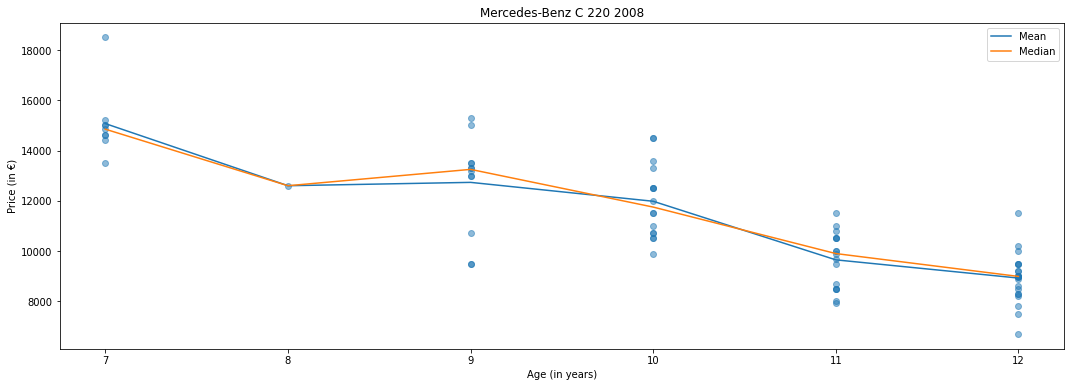

In [47]:
best_value = value_df[(value_df['maker'] == sorted_depriciation[-1][0][0]) & (value_df['model'] == sorted_depriciation[-1][0][1]) & (value_df['productionYear'] == sorted_depriciation[-1][0][2])]

mean = best_value.groupby(['age']).apply(lambda x: x['currentPrice'].mean())
median = best_value.groupby(['age']).apply(lambda x: x['currentPrice'].median())

fig, ax = plt.subplots(figsize=(18, 6))
ax.set_title(f'{sorted_depriciation[-1][0][0]} {sorted_depriciation[-1][0][1]} {int(sorted_depriciation[-1][0][2])}')
ax.set_xlabel('Age (in years)')
ax.set_ylabel('Price (in €)')
ax.scatter(best_value['age'], best_value['currentPrice'], alpha=0.5)
ax.plot(best_value['age'].unique(), mean)
ax.plot(best_value['age'].unique(), median)
ax.legend(['Mean','Median'])



In [48]:
sorted_depriciation

[(('Ford', 'Escort', 1996.0), 0.07735046996825347),
 (('VW Volkswagen', 'Golf', 2013.0), -0.039943960922902325),
 (('VW Volkswagen', 'Passat', 1996.0), -0.040260418994387134),
 (('VW Volkswagen', 'Passat', 1999.0), -0.04577100249770682),
 (('Audi', 'A6', 2001.0), -0.09592870314966266),
 (('Opel', 'Vectra', 1994.0), -0.09760982170567767),
 (('Fiat', 'Punto', 2005.0), -0.11681066421646186),
 (('Opel', 'Corsa', 2003.0), -0.14880982537019413),
 (('Ford', 'Focus', 2000.0), -0.14889639245888225),
 (('Opel', 'Vectra', 1995.0), -0.16133353333462547),
 (('Opel', 'Astra', 1997.0), -0.1629405211147833),
 (('Ford', 'Escort', 1993.0), -0.17590484554267516),
 (('Opel', 'Corsa', 1995.0), -0.1872750124244598),
 (('VW Volkswagen', 'Golf', 1995.0), -0.18809096541109308),
 (('Opel', 'Corsa', 2006.0), -0.18986066706780017),
 (('Opel', 'Astra', 1993.0), -0.21708958484728055),
 (('Audi', 'A4', 1995.0), -0.22466968788096117),
 (('Seat', 'Ibiza', 2006.0), -0.2298170802282798),
 (('Opel', 'Corsa', 2004.0), -0.

In [82]:

depriciation_df = pd.DataFrame()
depriciation_df['age'] = sorted(value_df['age'].unique())

value_df = groups.reset_index(drop=True)

for name, group in value_df.groupby(['maker', 'model', 'productionYear']):
  if len(group) >= 100:
    mean = group.groupby(['age']).apply(lambda x: x['currentPrice'].mean())
    median = group.groupby(['age']).apply(lambda x: x['currentPrice'].median())

    mean_change = np.empty((len(mean),))    
    median_change = np.empty((len(mean),))

    mean_change[:] = np.nan
    median_change[:] = np.nan

    for i in range(1, len(mean)):
      mean_change[i] = (mean.iloc[i] - mean.iloc[i - 1]) / mean.iloc[i - 1]      
      median_change[i] = (median.iloc[i] - median.iloc[i - 1]) / median.iloc[i - 1]
    
    # mean = mean.reset_index()
    # mean = mean.reset_index(drop=True)

    current_df = pd.DataFrame()
    current_df['age'] = mean.reset_index()['age']
    current_df[f'{name} mean'] = mean
    current_df[f'{name} median'] = median
    
    current_df[f'{name} mean change'] = mean_change
    current_df[f'{name} median change'] = median_change
    
    current_df[f'{name} count'] = len(group)
    

    depriciation_df = depriciation_df.merge(current_df, how='left', left_on='age', right_on='age')

Text(0.5, 1.0, 'Mean loss over years')

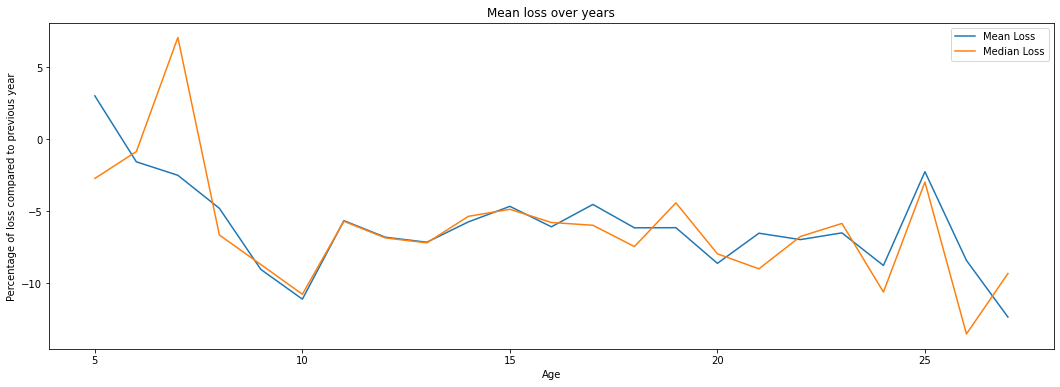

In [83]:
keys = value_df.groupby(['maker', 'model', 'productionYear']).groups.keys()

fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(depriciation_df.filter(regex='mean change').mean(axis=1) * 100)
ax.plot(depriciation_df.filter(regex='median change').mean(axis=1) * 100)

ax.legend(['Mean Loss','Median Loss'])
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of loss compared to previous year')
ax.set_title('Mean loss over years')

In [84]:
depriciation_df.filter(regex='mean change').mean(axis=1).mean() * 100

-6.068668487323424

# 3. Models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3.0 Prepreocessing for tree models

In [ ]:
import pandas as pd
from sklearn import preprocessing
import re

print('Are you sure? (y/n)')
assert(input() == 'y')
  
train_cols = ['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color', 'currentPrice'] 
df = pd.read_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json").dropna(subset=['date', 'fuelType', 'mileage','registrationType', 'transmissionType', 'color', 'currentPrice', 'maker', 'model', 'productionYear'], how='any')
regression_df = df
regression_df = df[(df['currentPrice'] >= 100) & (df['currentPrice'] <= 1000000)]

regression_df['productionYear'] = regression_df['productionYear'].apply(lambda x : int(float(re.sub("[^0-9.]", "", str(x)))) if x is not None else None)
regression_df = regression_df[regression_df['productionYear'] >= 1900]
regression_df = regression_df[regression_df['productionYear'] <= 2020]

regression_df['age'] = regression_df['date'].apply(lambda x: x.year) - regression_df['productionYear']
regression_df = regression_df[regression_df['age'] >= 0]

regression_df['date'] = regression_df['date'].apply(lambda x: str(x)[0:4])
regression_df['mileage'] = regression_df['mileage'].apply(lambda x: re.sub('[^0-9]','', (str(x).split('-')[0].strip())))
regression_df['registrationType'] = regression_df['registrationType'].apply(lambda x: x.strip())
regression_df['fuelType'] = regression_df['fuelType'].apply(lambda x: x.strip() if x is not None else None).replace('Дизел', 'Нафта').replace('Плин / Бензин', 'Бензин / Плин')
regression_df['transmissionType'] = regression_df['transmissionType'].apply(lambda x: x.strip()).replace('Streptronic / tiptronic', 'Steptronic / Tiptronic')
regression_df['color'] = regression_df['color'].apply(lambda x: 'unknown' if x is None else x)

regression_df['makerModelProductionYear'] = regression_df['maker'] + ' ' + regression_df['model'] + regression_df['productionYear'].astype(str)

regression_df.dropna(subset=train_cols, inplace=True, how='any')
regression_df.to_csv('/content/drive/My Drive/Data Mining Project/h2o-reg-data-raw.csv')
regression_df = regression_df.groupby(['maker', 'model', 'productionYear', 'date']).apply(lambda x: x[x['currentPrice'].between(x['currentPrice'].quantile(.15), x['currentPrice'].quantile(.85))]).reset_index(drop=True)
regression_df.dropna(subset=train_cols, inplace=True, how='any')
regression_df.to_csv('/content/drive/My Drive/Data Mining Project/h2o-reg-data-removed-outliers.csv')

Are you sure? (y/n)
y


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## 3.1 Regression Tree with raw data

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()

train_cols = ['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color']
frame = h2o.import_file("/content/drive/My Drive/Data Mining Project/h2o-reg-data-raw.csv")

train, test, valid = frame.split_frame(ratios=[.7, .15])

decision_tree = H2ORandomForestEstimator(mtries=9, ntrees=1, sample_rate=1)

decision_tree.train(
     x=train_cols,
     y='currentPrice', 
     training_frame=train,
     validation_frame=valid)

decision_tree.model_performance(valid)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.994 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 447065103.11488104
RMSE: 21143.9140916454
MAE: 1774.116580779354
RMSLE: 0.590885154616082
Mean Residual Deviance: 447065103.11488104


In [ ]:
decision_tree

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602355917347_7


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,1.0,660023.0,20.0,20.0,20.0,25945.0,25945.0,25945.0




ModelMetricsRegression: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
MAE: NaN
RMSLE: NaN
Mean Residual Deviance: NaN

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 447065103.11488104
RMSE: 21143.9140916454
MAE: 1774.116580779354
RMSLE: 0.590885154616082
Mean Residual Deviance: 447065103.11488104

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-10 19:02:43,0.005 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-10 19:02:46,3.068 sec,1.0,NaN,NaN,NaN,21143.914092,1774.116581,4.470651e+08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,model,2.354196e+12,1.000000,0.215471
1,mileage,1.998633e+12,0.848966,0.182927
2,productionYear,1.992486e+12,0.846355,0.182365
3,age,1.720174e+12,0.730684,0.157441
4,maker,1.285640e+12,0.546106,0.117670
5,color,1.262131e+12,0.536120,0.115518
6,transmissionType,1.745311e+11,0.074136,0.015974
7,registrationType,9.188652e+10,0.039031,0.008410
8,fuelType,4.614846e+10,0.019603,0.004224


## 3.2 Random Forrest with raw data

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()

train_cols = ['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color']
frame = h2o.import_file('/content/drive/My Drive/Data Mining Project/h2o-reg-data-raw.csv')

train, test, valid = frame.split_frame(ratios=[.7, .15])

random_forrest = H2ORandomForestEstimator()

random_forrest.train(
    x=['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color'],
     y='currentPrice', 
     training_frame=train,
     validation_frame=valid)

random_forrest.model_performance(valid)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 51 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.519 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 259310737.16501215
RMSE: 16103.128179487741
MAE: 1541.641839396241
RMSLE: 0.5337592514597457
Mean Residual Deviance: 259310737.16501215


In [ ]:
random_forrest

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602355917347_8


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,26321621.0,20.0,20.0,20.0,12780.0,20536.0,17877.56




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 232638734.99843794
RMSE: 15252.499303341663
MAE: 1547.0547813836029
RMSLE: 0.5214189649295757
Mean Residual Deviance: 232638734.99843794

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 259310737.16501215
RMSE: 16103.128179487741
MAE: 1541.641839396241
RMSLE: 0.5337592514597457
Mean Residual Deviance: 259310737.16501215

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-10 19:02:56,0.002 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-10 19:02:57,1.109 sec,1.0,20964.553178,2011.239307,4.395125e+08,22617.415670,1998.783043,5.115475e+08
2,,2020-10-10 19:02:58,2.338 sec,2.0,17550.674921,1885.668417,3.080262e+08,18448.080656,1832.182610,3.403317e+08
3,,2020-10-10 19:02:59,3.445 sec,3.0,16699.852959,1825.042783,2.788851e+08,16904.783584,1714.688017,2.857717e+08
4,,2020-10-10 19:03:04,8.143 sec,8.0,16543.891675,1701.869986,2.737004e+08,16516.940991,1615.794407,2.728093e+08
5,,2020-10-10 19:03:09,12.973 sec,13.0,16148.709654,1661.705517,2.607808e+08,16687.155506,1590.736914,2.784612e+08
6,,2020-10-10 19:03:13,17.236 sec,17.0,16022.999234,1637.175064,2.567365e+08,16647.024420,1594.260495,2.771234e+08
7,,2020-10-10 19:03:18,22.212 sec,22.0,15726.597854,1604.350855,2.473259e+08,16635.025304,1588.617741,2.767241e+08
8,,2020-10-10 19:03:24,27.621 sec,27.0,15657.950723,1595.994961,2.451714e+08,16341.137230,1571.653707,2.670328e+08
9,,2020-10-10 19:03:30,33.990 sec,33.0,15605.526282,1586.759408,2.435325e+08,16136.984722,1548.383434,2.604023e+08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,model,7.129297e+13,1.000000,0.192246
1,mileage,6.758842e+13,0.948038,0.182256
2,age,6.606019e+13,0.926602,0.178135
3,productionYear,4.763893e+13,0.668214,0.128461
4,maker,4.049785e+13,0.568048,0.109205
5,color,3.586932e+13,0.503126,0.096724
6,registrationType,1.493955e+13,0.209551,0.040285
7,transmissionType,1.409597e+13,0.197719,0.038011
8,fuelType,1.285957e+13,0.180376,0.034677


## 3.3 Regression tree with removed outliers

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()

train_cols = ['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color']

frame = h2o.import_file("/content/drive/My Drive/Data Mining Project/h2o-reg-data-removed-outliers.csv")

train, test, valid = frame.split_frame(ratios=[.7, .15])

decision_tree = H2ORandomForestEstimator(mtries=9, ntrees=1, sample_rate=1)

decision_tree.train(
    x=train_cols,
     y='currentPrice', 
     training_frame=train,
     validation_frame=valid)

decision_tree.model_performance(valid)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 mins 55 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.432 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 103545560.29882947
RMSE: 10175.73389485149
MAE: 1020.5727124732085
RMSLE: 0.3909077174523354
Mean Residual Deviance: 103545560.29882947


In [ ]:
decision_tree

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602355917347_9


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1.0,1.0,519017.0,20.0,20.0,20.0,20408.0,20408.0,20408.0




ModelMetricsRegression: drf
** Reported on train data. **

MSE: NaN
RMSE: NaN
MAE: NaN
RMSLE: NaN
Mean Residual Deviance: NaN

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 103545560.29882947
RMSE: 10175.73389485149
MAE: 1020.5727124732085
RMSLE: 0.3909077174523354
Mean Residual Deviance: 103545560.29882947

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-10 19:03:58,0.005 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-10 19:03:59,1.736 sec,1.0,NaN,NaN,NaN,10175.733895,1020.572712,1.035456e+08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,model,1.145371e+12,1.000000,0.404567
1,age,4.986760e+11,0.435384,0.176142
2,maker,4.616180e+11,0.403029,0.163052
3,mileage,3.189920e+11,0.278505,0.112674
4,productionYear,1.823473e+11,0.159204,0.064408
5,transmissionType,1.024947e+11,0.089486,0.036203
6,color,6.952065e+10,0.060697,0.024556
7,fuelType,4.491082e+10,0.039211,0.015863
8,registrationType,7.175742e+09,0.006265,0.002535


## 3.4 Random Forrest with removed outliers

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()

train_cols = ['age', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color']

frame = h2o.import_file("/content/drive/My Drive/Data Mining Project/h2o-reg-data-removed-outliers.csv")

train, test, valid = frame.split_frame(ratios=[.7, .15])

random_forrest = H2ORandomForestEstimator()

random_forrest.train(
    x=train_cols,
     y='currentPrice', 
     training_frame=train,
     validation_frame=valid)

random_forrest.model_performance(valid)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,12 mins 04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.402 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 78806953.95830514
RMSE: 8877.32808666578
MAE: 832.5696362699573
RMSLE: 0.3291851976215627
Mean Residual Deviance: 78806953.95830514


In [ ]:
random_forrest

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602355917347_10


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20127279.0,20.0,20.0,20.0,10722.0,15437.0,13561.46




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 37380375.49154854
RMSE: 6113.949254904602
MAE: 851.9808051198012
RMSLE: 0.3450618833773725
Mean Residual Deviance: 37380375.49154854

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 78806953.95830514
RMSE: 8877.32808666578
MAE: 832.5696362699573
RMSLE: 0.3291851976215627
Mean Residual Deviance: 78806953.95830514

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2020-10-10 19:04:07,0.004 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-10-10 19:04:07,0.790 sec,1.0,9315.398843,1259.667702,8.677666e+07,9370.478975,1242.998367,8.780588e+07
2,,2020-10-10 19:04:08,1.400 sec,2.0,11592.922326,1233.242305,1.343958e+08,10557.069932,1133.087531,1.114517e+08
3,,2020-10-10 19:04:09,2.127 sec,3.0,10566.339201,1206.767432,1.116475e+08,9724.225805,1046.594117,9.456057e+07
4,,2020-10-10 19:04:10,2.927 sec,4.0,7711.354523,1131.582551,5.946499e+07,9376.007922,979.647622,8.790952e+07
5,,2020-10-10 19:04:10,3.787 sec,5.0,7330.001373,1111.453636,5.372892e+07,9211.420231,948.012924,8.485026e+07
6,,2020-10-10 19:04:14,7.851 sec,11.0,6293.524815,961.686306,3.960845e+07,8957.768198,881.388208,8.024161e+07
7,,2020-10-10 19:04:19,11.994 sec,17.0,6127.327056,898.779118,3.754414e+07,8972.004159,860.761648,8.049686e+07
8,,2020-10-10 19:04:23,16.368 sec,23.0,6060.447077,881.135999,3.672902e+07,8941.392658,858.705051,7.994850e+07
9,,2020-10-10 19:04:27,20.475 sec,29.0,6088.295047,869.483375,3.706734e+07,8908.812544,846.582405,7.936694e+07



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,1.882377e+13,1.000000,0.265480
1,model,1.858623e+13,0.987381,0.262130
2,maker,8.178862e+12,0.434497,0.115350
3,mileage,6.405457e+12,0.340286,0.090339
4,transmissionType,5.835163e+12,0.309989,0.082296
5,productionYear,4.676201e+12,0.248420,0.065951
6,color,4.104448e+12,0.218046,0.057887
7,fuelType,2.958751e+12,0.157182,0.041729
8,registrationType,1.335818e+12,0.070964,0.018840


## 3.5 XGBoost with raw data

In [ ]:
!pip install h2o

import h2o
from h2o.estimators import H2OXGBoostEstimator
h2o.init()

train_cols = ['date', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color', 'age', 'currentPrice']
frame = h2o.import_file("/content/drive/My Drive/Data Mining Project/h2o-reg-data-raw.csv")[:, train_cols]
frame.impute(column=-1, method='mode')

train, test, valid = frame.split_frame(ratios=[.7, .15])

xgb = H2OXGBoostEstimator(booster='dart')

xgb.train(
     x=train_cols,
     y='currentPrice', 
     training_frame=train)

xgb.model_performance(valid)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,36 mins 27 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,409.6 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 166484896.62002957
RMSE: 12902.902643205116
MAE: 1590.863384815992
RMSLE: 0.5611568696761834
Mean Residual Deviance: 166484896.62002957


In [ ]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602355917347_25


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 88729144.66367418
RMSE: 9419.614889350529
MAE: 1422.1718574257488
RMSLE: 0.5332197907131734
Mean Residual Deviance: 88729144.66367418

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-10 19:28:30,0.001 sec,0.0,13942.051696,4860.507673,1.943808e+08
1,,2020-10-10 19:28:30,0.253 sec,1.0,12543.212447,3483.319932,1.573322e+08
2,,2020-10-10 19:28:30,0.369 sec,2.0,11779.431902,2599.311756,1.387550e+08
3,,2020-10-10 19:28:30,0.502 sec,3.0,11224.029638,2109.140454,1.259788e+08
4,,2020-10-10 19:28:31,0.664 sec,4.0,10839.234097,1865.220145,1.174890e+08
5,,2020-10-10 19:28:31,0.809 sec,5.0,10587.793613,1756.812967,1.121014e+08
6,,2020-10-10 19:28:31,0.962 sec,6.0,10362.448188,1679.320978,1.073803e+08
7,,2020-10-10 19:28:31,1.122 sec,7.0,10258.986785,1652.462098,1.052468e+08
8,,2020-10-10 19:28:31,1.300 sec,8.0,10211.532296,1648.075342,1.042754e+08
9,,2020-10-10 19:28:31,1.432 sec,9.0,10178.272805,1637.285677,1.035972e+08



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,productionYear,2.244967e+12,1.000000,0.245403
1,mileage,1.192816e+12,0.531329,0.130390
2,model.Leon,7.681288e+11,0.342156,0.083966
3,date,6.635150e+11,0.295557,0.072531
4,age,6.557107e+11,0.292080,0.071677
5,transmissionType.Рачен,6.316122e+11,0.281346,0.069043
6,color.Црна,5.832952e+11,0.259824,0.063762
7,registrationType.Македонска,2.404663e+11,0.107114,0.026286
8,color.Црвена,2.153083e+11,0.095907,0.023536
9,model.Cayenne,1.691542e+11,0.075348,0.018491



See the whole table with table.as_data_frame()


## 3.6 XGBoost with removed outliers

In [ ]:
!pip install h2o

import h2o
from h2o.estimators import H2OXGBoostEstimator
h2o.init()

train_cols = ['date', 'productionYear', 'mileage', 'registrationType', 'fuelType', 'transmissionType', 'maker', 'model', 'color', 'age', 'currentPrice']
frame = h2o.import_file("/content/drive/My Drive/Data Mining Project/h2o-reg-data-removed-outliers-xgb.csv")[:, train_cols]
frame.impute(column=-1, method='mode')

train, test, valid = frame.split_frame(ratios=[.7, .15])

xgb = H2OXGBoostEstimator(booster='dart')

xgb.train(
     x=train_cols,
     y='currentPrice', 
     training_frame=train)

xgb.model_performance(valid)


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,34 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_ts3y3a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,470.6 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 74458826.13459054
RMSE: 8628.952783193945
MAE: 1218.9585104800003
RMSLE: 0.4105960796576913
Mean Residual Deviance: 74458826.13459054


In [ ]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602355917347_24


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 6063723.059491769
RMSE: 2462.4628036767926
MAE: 1023.6933181663933
RMSLE: 0.4005400808199954
Mean Residual Deviance: 6063723.059491769

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-10 19:27:01,0.003 sec,0.0,10728.402629,4682.046849,1.150986e+08
1,,2020-10-10 19:27:02,0.175 sec,1.0,8847.643855,3320.531060,7.828080e+07
2,,2020-10-10 19:27:02,0.256 sec,2.0,7470.013544,2434.713453,5.580110e+07
3,,2020-10-10 19:27:02,0.334 sec,3.0,6468.237455,1916.839061,4.183810e+07
4,,2020-10-10 19:27:02,0.417 sec,4.0,5689.860230,1642.654792,3.237451e+07
5,,2020-10-10 19:27:02,0.507 sec,5.0,5093.051321,1508.856520,2.593917e+07
6,,2020-10-10 19:27:02,0.596 sec,6.0,4623.494618,1424.258334,2.137670e+07
7,,2020-10-10 19:27:02,0.684 sec,7.0,4278.181583,1377.676256,1.830284e+07
8,,2020-10-10 19:27:02,0.767 sec,8.0,4002.677060,1349.612125,1.602142e+07
9,,2020-10-10 19:27:02,0.869 sec,9.0,3792.562794,1345.893717,1.438353e+07



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,model.GL 63 AMG,1.761083e+12,1.000000,0.278763
1,productionYear,1.666309e+12,0.946184,0.263761
2,age,5.666425e+11,0.321758,0.089694
3,mileage,3.801986e+11,0.215889,0.060182
4,transmissionType.Рачен,3.799654e+11,0.215757,0.060145
5,color.Бела,3.096913e+11,0.175853,0.049021
6,model.Phaeton,2.205969e+11,0.125262,0.034918
7,maker.Porsche,2.047406e+11,0.116258,0.032409
8,model.Cayenne,1.309785e+11,0.074374,0.020733
9,fuelType.Друго,1.217963e+11,0.069160,0.019279



See the whole table with table.as_data_frame()


In [ ]:
dfCont = pd.read_json("/content/drive/My Drive/Data Mining Project/dataset-v1.0.0.json").dropna(subset=['date', 'fuelType', 'mileage','registrationType', 'transmissionType', 'color', 'currentPrice', 'maker', 'model', 'productionYear'])
dfCont = df[(df['currentPrice'] >= 100) & (df['currentPrice'] <= 1000000)]

dfCont['productionYear'] = dfCont['productionYear'].apply(lambda x : int(float(re.sub("[^0-9.]", "", str(x)))) if x is not None else None)
dfCont = dfCont[dfCont['productionYear'] >= 1900]
dfCont = dfCont[dfCont['productionYear'] <= 2020]

dfCont['age'] = dfCont['date'].apply(lambda x: x.year) - dfCont['productionYear']
dfCont = dfCont[dfCont['age'] >= 0]

dfCont['date'] = dfCont['date'].apply(lambda x: str(x)[0:4])
dfCont['mileage'] = dfCont['mileage'].apply(lambda x: float(re.sub('[^0-9]','', (str(x).split('-')[0].strip())))if x is not None else None)
dfCont['registrationType'] = dfCont['registrationType'].apply(lambda x: x.strip())
dfCont['fuelType'] = dfCont['fuelType'].apply(lambda x: x.strip() if x is not None else None).replace('Дизел', 'Нафта')
dfCont['transmissionType'] = dfCont['transmissionType'].apply(lambda x: x.strip()).replace('Streptronic / tiptronic', 'Steptronic')
dfCont['adType']=dfCont['adType'].apply(lambda x: 'unknown' if x is None else x)
dfCont['emissionClass']=dfCont['emissionClass'].apply(lambda x: 'unknown' if x is None else x)
dfCont['municipality']=dfCont['municipality'].apply(lambda x: 'unknown' if x is None else x)
dfCont['currentPrice']=dfCont['currentPrice'].apply(lambda x: int(x) if x is float else x)

dfCont['color'] = dfCont['color'].apply(lambda x: 'unknown' if x is None else x).replace('Жолта/Златна','Жолта'	)
dfCont['carType']=dfCont['carType'].replace('Теренци - SUV','Теренско').replace('SUV/Теренско','Теренско').replace('Maли градски','градски').replace('Мал автомобил','Maл').apply(lambda x: 'unknown' if x is None else x)
dfCont['makerModelProductionYear'] = dfCont['maker'] + ' ' + dfCont['model'] + dfCont['productionYear'].astype(str)
dfCont.to_csv('/content/drive/My Drive/Data Mining Project/h2o-reg-data-raw.csv')
dfCont = dfCont.groupby(['maker', 'model', 'productionYear', 'date']).apply(lambda x: x[x['currentPrice'].between(x['currentPrice'].quantile(.15), x['currentPrice'].quantile(.85))]).reset_index(drop=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
import numpy as np

def getNumbers(dataFrameC):
  arrayNumbers=np.ndarray(shape=(1))
  value=1
  for i in dataFrameC:
    arrayNumbers=np.append(arrayNumbers,value)
    value=value+1
  return arrayNumbers
def buildMap(dataFrameC):
  arrayNumbers=getNumbers(dataFrameC)
  finalDict=dict()
  finalDict= dict(zip(dataFrameC, arrayNumbers))
  return finalDict

In [ ]:
dfCont=dfCont.drop(['title','sellerName','sellerNumber','img_links','description','registeredUntil','power','sellerType','age','source','mileage','oldPrice'],axis=1)
dfCont['city'] = dfCont['city'].map(buildMap(dfCont.city.unique()))
dfCont['adType'] = dfCont['adType'].map(buildMap(dfCont.adType.unique()))
dfCont['carType'] = dfCont['carType'].map(buildMap(dfCont.carType.unique()))
dfCont['registrationType'] = dfCont['registrationType'].map(buildMap(dfCont.registrationType.unique()))
dfCont['municipality'] = dfCont['municipality'].map(buildMap(dfCont.municipality.unique()))
dfCont['transmissionType'] = dfCont['transmissionType'].map(buildMap(dfCont.transmissionType.unique()))
dfCont['color'] = dfCont['color'].map(buildMap(dfCont.color.unique()))
dfCont['fuelType'] = dfCont['fuelType'].map(buildMap(dfCont.fuelType.unique()))
dfCont['model'] = dfCont['model'].map(buildMap(dfCont.model.unique()))
dfCont['emissionClass'] = dfCont['emissionClass'].map(buildMap(dfCont.emissionClass.unique()))
dfCont['maker'] = dfCont['maker'].map(buildMap(dfCont.maker.unique()))
dfCont['makerModelProductionYear'] = dfCont['makerModelProductionYear'].map(buildMap(dfCont.makerModelProductionYear.unique()))


dfCont['currentPrice']=pd.to_numeric(dfCont['currentPrice'], downcast='integer')
dfCont['city']=pd.to_numeric(dfCont['city'], downcast='integer')
dfCont['adType']=pd.to_numeric(dfCont['adType'], downcast='integer')
dfCont['carType']=pd.to_numeric(dfCont['carType'], downcast='integer')
dfCont['registrationType']=pd.to_numeric(dfCont['registrationType'], downcast='integer')
dfCont['municipality']=pd.to_numeric(dfCont['municipality'], downcast='integer')
dfCont['transmissionType']=pd.to_numeric(dfCont['transmissionType'], downcast='integer')
dfCont['color']=pd.to_numeric(dfCont['color'], downcast='integer')
dfCont['fuelType']=pd.to_numeric(dfCont['fuelType'], downcast='integer')
dfCont['emissionClass']=pd.to_numeric(dfCont['emissionClass'], downcast='integer')
dfCont['maker']=pd.to_numeric(dfCont['maker'], downcast='integer')
dfCont['makerModelProductionYear']=pd.to_numeric(dfCont['makerModelProductionYear'], downcast='integer')
dfCont['model']=pd.to_numeric(dfCont['model'], downcast='integer')
dfCont=dfCont.dropna()


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_val_predict
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential
from keras.layers import Bidirectional
from keras.layers import Embedding, Dense, LSTM, RNN,GRU, Bidirectional, Conv1D,MaxPooling1D,Flatten
from sklearn.metrics import classification_report
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)


train_dataset = dfCont.sample(frac=0.8, random_state=0)
test_dataset = dfCont.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('currentPrice')
test_labels = test_features.pop('currentPrice')


dfCont

,currentPrice,date,city,municipality,maker,model,productionYear,fuelType,color,registrationType,transmissionType,carType,emissionClass,adType,makerModelProductionYear
1,111,2020,1.0,1,0,1,1981.0,0,1,0,0,0,1,0,1
2,2000,2017,2.0,2,1,2,2002.0,1,1,0,0,1,0,1,2
3,2000,2016,3.0,2,1,2,2015.0,0,2,0,0,2,0,1,3
4,4500,2019,4.0,2,1,2,2018.0,1,3,0,0,1,0,1,4
5,3600,2020,5.0,3,1,2,2020.0,0,1,0,0,2,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57977,11600,2020,13.0,2,78,906,2015.0,1,2,0,0,3,0,1,7406
57978,14000,2019,28.0,3,78,906,2017.0,0,2,0,0,3,0,1,7407
57979,2222,2020,4.0,2,78,1,1980.0,0,1,0,0,1,0,1,7408
57980,11000,2015,16.0,2,78,1,2015.0,2,1,0,0,3,0,1,7409


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_15 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


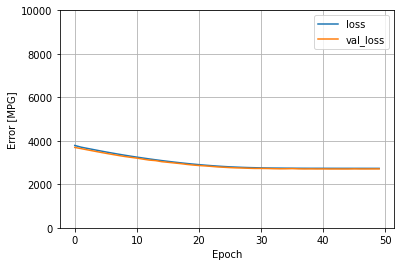

In [ ]:
#linear model 1
model = np.array(train_features['makerModelProductionYear'])

model_normalizer = preprocessing.Normalization(input_shape=[1,])
model_normalizer.adapt(currentPrice)
model = tf.keras.Sequential([
    model_normalizer,
    layers.Dense(units=1)
])

print(model.summary())
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
history = model.fit(
    train_features['makerModelProductionYear'], train_labels,
    epochs=50,
    verbose=0,
    validation_split = 0.2)

plot_loss(history)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_16 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


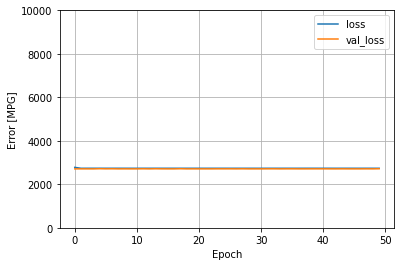

In [ ]:
#linear model 2
model = np.array(train_features['carType'])

model_normalizer = preprocessing.Normalization(input_shape=[1,])
model_normalizer.adapt(currentPrice)
model = tf.keras.Sequential([
    model_normalizer,
    layers.Dense(units=1)
])

print(model.summary())
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
history = model.fit(
    train_features['carType'], train_labels,
    epochs=50,
    verbose=0,
    validation_split = 0.2)

plot_loss(history)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_25 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


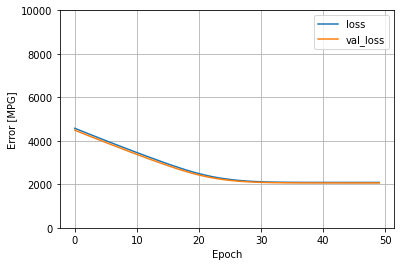

In [ ]:
#linear model 3
model = np.array(train_features['productionYear'])

model_normalizer = preprocessing.Normalization(input_shape=[1,])
model_normalizer.adapt(currentPrice)
model = tf.keras.Sequential([
    model_normalizer,
    layers.Dense(units=1)
])

print(model.summary())
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')
history = model.fit(
    train_features['productionYear'], train_labels,
    epochs=50,
    verbose=0,
    validation_split = 0.2)

plot_loss(history)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 14)                29        
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1920      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 101,150
Trainable params: 101,121
Non-trainable params: 29
_______________________________________________

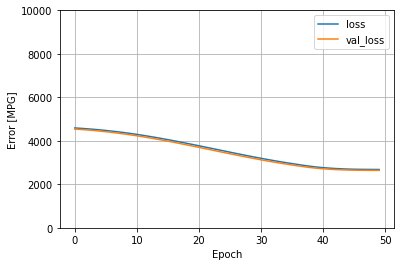

In [ ]:
model=Sequential()
model.add(preprocessing.Normalization(input_shape=[14,]))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1,  activation='relu', kernel_initializer='he_normal'))
model.compile(loss="mean_absolute_error",
                  optimizer=Adam(0.00001)
                  )
print(model.summary())
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]
train_features=np.asarray(train_features).astype(np.float32)
train_labels=np.asarray(train_labels).astype(np.float32)
history = model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=50)


plot_loss(history)